In [1]:
import pandas as pd
import geopandas as gpd
import pysal as ps
import numpy as np

In [2]:
print(pd.__version__)
print(gpd.__version__)
print(ps.__version__)

1.0.5
0.8.1
2.2.0


In [3]:
nutrients = gpd.read_file("../data/geojson/food_consumption_msoa.geojson")
nutrients.columns.values

array(['id', 'age_0_17', 'age_18_64', 'age_65+', 'alcohol',
       'alcohol_ci95', 'alcohol_perc2.5', 'alcohol_perc25',
       'alcohol_perc50', 'alcohol_perc75', 'alcohol_perc97.5',
       'alcohol_std', 'apprenticeship', 'apprenticeship_p', 'area_sq_km',
       'avg_age', 'avg_age_norm', 'carb', 'carb_ci95', 'carb_perc2.5',
       'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5',
       'carb_std', 'energy_alcohol', 'energy_alcohol_ci95',
       'energy_alcohol_perc2.5', 'energy_alcohol_perc25',
       'energy_alcohol_perc50', 'energy_alcohol_perc75',
       'energy_alcohol_perc97.5', 'energy_alcohol_std', 'energy_carb',
       'energy_carb_ci95', 'energy_carb_perc2.5', 'energy_carb_perc25',
       'energy_carb_perc50', 'energy_carb_perc75', 'energy_carb_perc97.5',
       'energy_carb_std', 'energy_density', 'energy_fat',
       'energy_fat_ci95', 'energy_fat_perc2.5', 'energy_fat_perc25',
       'energy_fat_perc50', 'energy_fat_perc75', 'energy_fat_perc97.5',
       'ene

<AxesSubplot:>

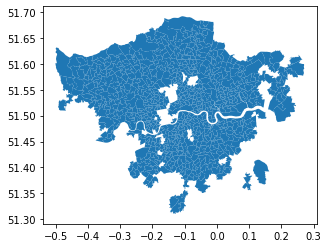

In [5]:
nutrients = nutrients[nutrients['representativeness_norm']>=0.15]
nutrients.plot()

In [24]:
outcome = 'level4_p'
determinants = ['fat', 'carb', 'protein', 'fibre','female_p', 'avg_age_norm', 'net_income_ahc_norm']

Y = np.array(nutrients[outcome], dtype='float32').T
Y.shape = (len(Y),1)

X = np.array(nutrients[determinants], dtype='float32')

In [27]:
W = ps.lib.weights.Queen.from_dataframe(nutrients)
W.t = 'r'

In [35]:
model = ps.model.spreg.ML_Error(Y, X, w=W, name_y=outcome, name_x=attrs)
print(model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    level4_p                Number of Observations:         774
Mean dependent var  :      0.3833                Number of Variables   :           8
S.D. dependent var  :      0.1277                Degrees of Freedom    :         766
Pseudo R-squared    :      0.7745
Sigma-square ML     :       0.002                Log likelihood        :    1317.768
S.E of regression   :       0.040                Akaike info criterion :   -2619.535
                                                 Schwarz criterion     :   -2582.323

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

Define Spatial Durbin Error Model in PySAL

In [31]:
def sdem(df, attr_y, attrs_x, w):
    
    y = np.array(df[attr_y]).T
    y.shape = (len(y),1)

    x = np.array(df[attrs_x])

    lag_x = ps.lib.weights.lag_spatial(w, x) 
    new_x = np.hstack((x,lag_x))

    model = ps.model.spreg.ML_Error(y, new_x, w, name_x=attrs_x+["lag_"+x for x in attrs_x], name_y=attr_y)

    return model

In [33]:
m = sdem(nutrients, outcome, attrs, W)
print(m.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :    level4_p                Number of Observations:         774
Mean dependent var  :      0.3833                Number of Variables   :          15
S.D. dependent var  :      0.1277                Degrees of Freedom    :         759
Pseudo R-squared    :      0.8291
Sigma-square ML     :       0.002                Log likelihood        :    1350.906
S.E of regression   :       0.040                Akaike info criterion :   -2671.812
                                                 Schwarz criterion     :   -2602.039

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------